In [11]:
%reload_kedro 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import warnings

pd.set_option('display.float_format', lambda x: '%.3f' % x)

[02/21/23 18:09:14] INFO     Resolved project path as: /home/mayara/desafio_ds/desafio-titanic.     ]8;id=208859;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=347419;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#132\132]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/21/23 18:09:17] INFO     Kedro project desafio_titanic                                          ]8;id=593552;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=50379;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#101\101]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=793253;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=980520;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#102\102]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=697419;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=617517;file:///home/mayara/desafio_ds/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

In [12]:
warnings.filterwarnings("ignore")

In [13]:
catalog.list()

['train', 'test', 'parameters']

# Carregando os dados

In [14]:
train = pd.read_csv('/home/mayara/desafio_ds/desafio-titanic/data/01_raw/train.csv')

In [15]:
test = pd.read_csv('/home/mayara/desafio_ds/desafio-titanic/data/01_raw/test.csv')

# Explorando os dados

In [16]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


# Verificando os nulos

In [18]:
train.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#devidos a quantidade de nulos em cabin, optou-se pela sua exclusão dos dados
#devido a pluralidade e baixa relevância para o modelo optou-se pela exclusão de Ticket

In [20]:
train = train.drop(columns=['PassengerId','Ticket','Cabin'])
train = train.dropna(subset= ['Embarked'])   #exclusão dos dois nulos de Embarked

# Explorando os dados

<seaborn.axisgrid.PairGrid object at 0x7f4daa6d6e20>

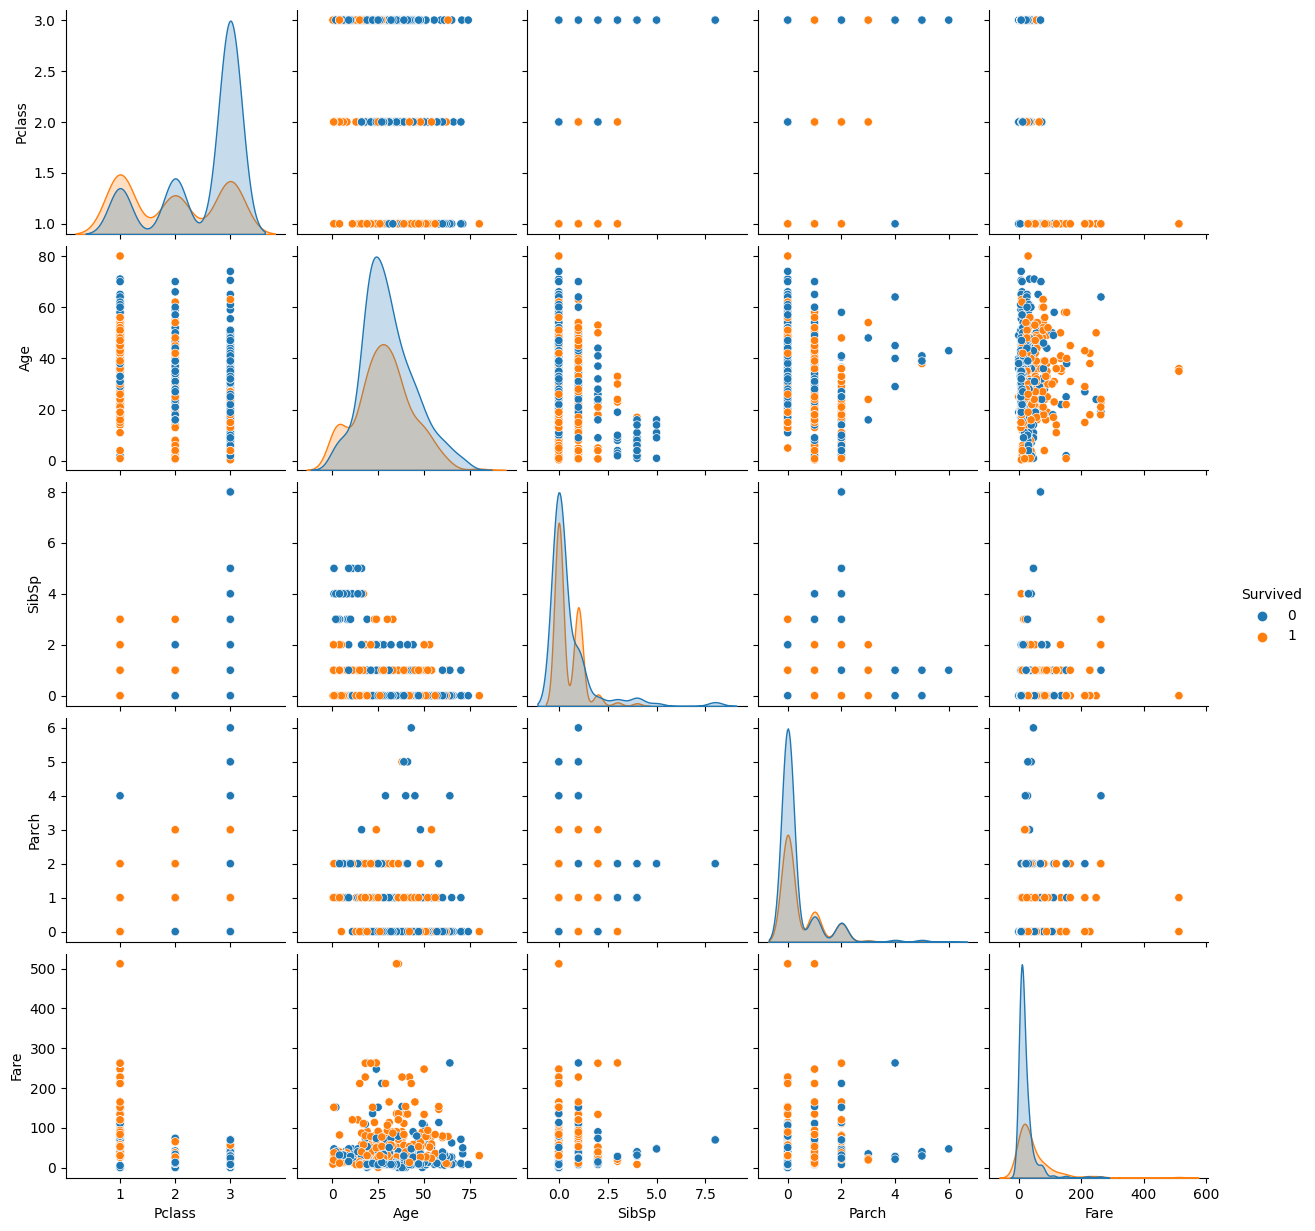

In [22]:
sns.pairplot(data=train, hue ='Survived')

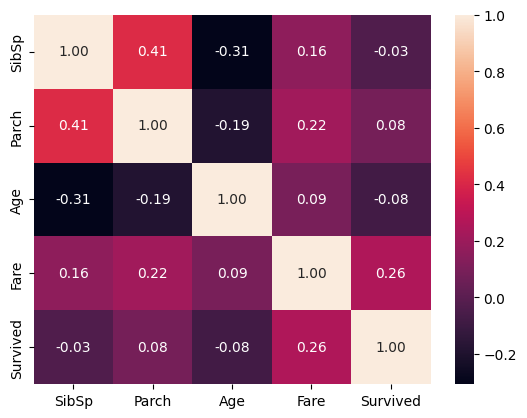

In [23]:
list1 = ["SibSp", "Parch", "Age", "Fare","Survived"]
sns.heatmap(train[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [24]:
# Feature Engineering

In [25]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('. ')[0])

In [26]:
train = train.drop(columns='Name')

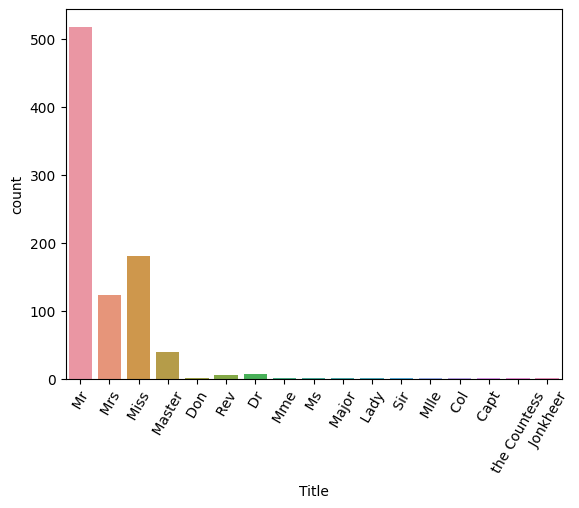

In [27]:
sns.countplot(x="Title", data = train)
plt.xticks(rotation = 60)
plt.show()

In [28]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [29]:
#devido a grande variedade de títulos, e baixa quantidade na maioria, iremos setorizar em 5 categorias apenas

train['Title'] = train['Title'].replace([' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Other')

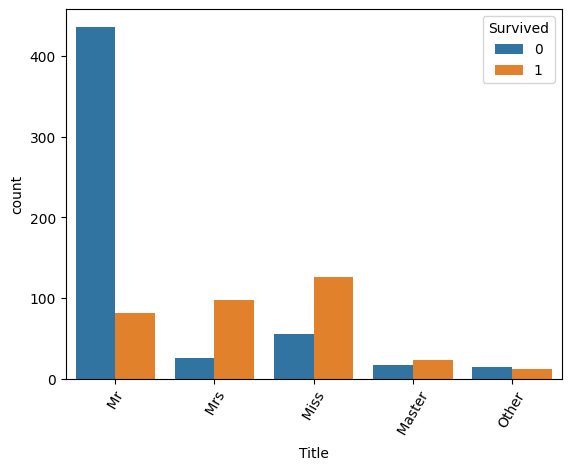

In [30]:
sns.countplot(x="Title", data = train, hue= 'Survived')
plt.xticks(rotation = 60)
plt.show()

In [31]:
def age_classification(age):
    if age < 12:
        return 'child'
    elif age < 18:
        return 'young'
    elif age < 45:
        return 'adult'
    elif age < 90:
        return 'elderly'
    else:
        return age

In [32]:
train['Age_Class'] = train['Age'].apply(age_classification)

In [33]:
train["Fsize"] = train["SibSp"] + train["Parch"] + 1

In [34]:
train = train.drop(columns=['SibSp','Parch'])

In [35]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_Class,Fsize
0,0,3,male,22.000,7.250,S,Mr,adult,2
1,1,1,female,38.000,71.283,C,Mrs,adult,2
2,1,3,female,26.000,7.925,S,Miss,adult,1
3,1,1,female,35.000,53.100,S,Mrs,adult,2
4,0,3,male,35.000,8.050,S,Mr,adult,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,13.000,S,Other,adult,1
887,1,1,female,19.000,30.000,S,Miss,adult,1
888,0,3,female,NaN,23.450,S,Miss,NaN,4
889,1,1,male,26.000,30.000,C,Mr,adult,1


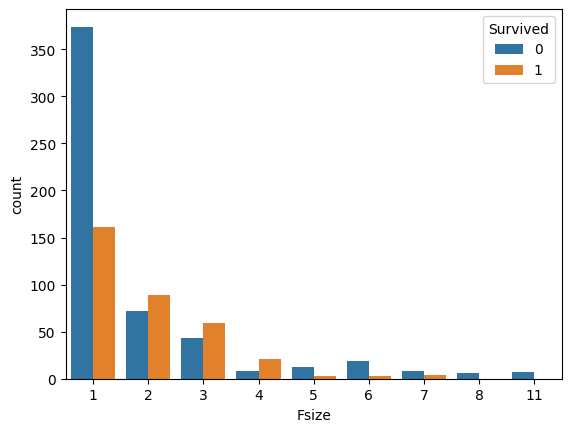

In [36]:
sns.countplot(x = "Fsize", hue = "Survived", data = train)

# Tratanto os nulos

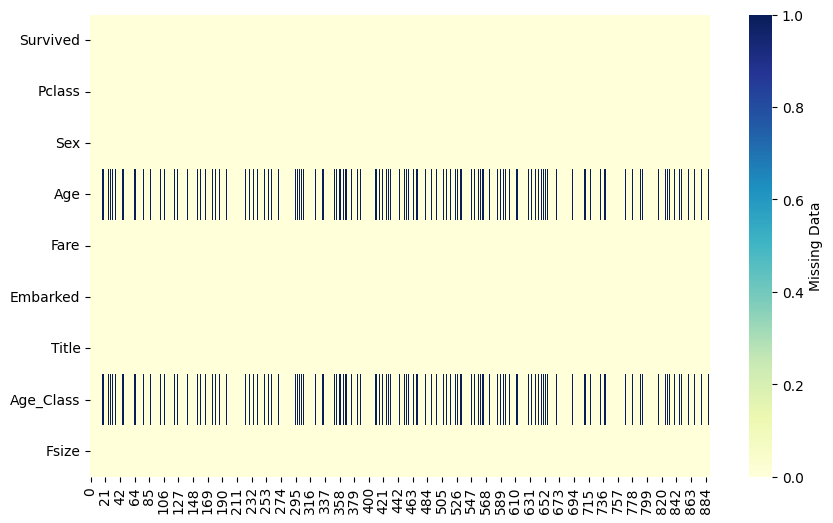

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

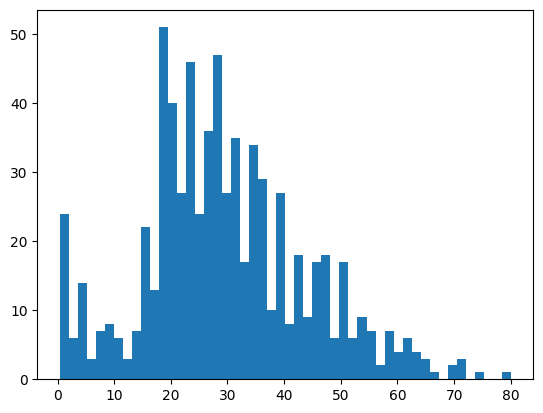

In [38]:
train['Age'].hist(grid = False, bins = 50)

In [39]:
tmp = train.dropna()

(
    array([15.,  5., 11.,  2.,  3.,  2.,  1.,  3.,  3., 10.,  6., 18.,  8.,
       11., 20.,  6., 17., 15., 10., 17.,  7., 17., 12.,  4., 11.,  2.,
        7.,  3.,  5.,  7.,  4.,  7.,  3.,  4.,  3.,  0.,  3.,  2.,  1.,
        2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
    array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
       11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
       22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
       33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
       44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
       56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
       67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
       78.4084, 80.    ]),
    <BarContainer object of 50 artists>
)

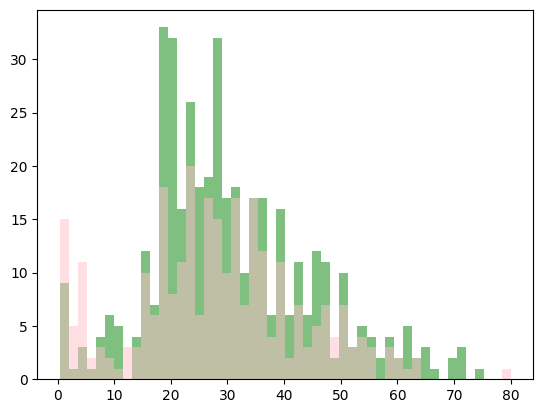

In [40]:
a = tmp[tmp['Survived'] == 0]['Age']
b = tmp[tmp['Survived'] == 1]['Age']
bins = np.histogram(np.hstack((a,b)), bins=50)[1]
plt.hist(a, bins, color="green", alpha=0.5)
plt.hist(b, bins, color="pink", alpha=0.5)

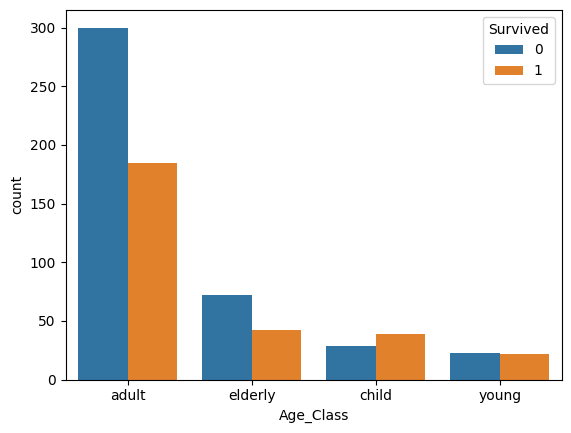

In [41]:
sns.countplot(data=train, x = 'Age_Class', hue = 'Survived')

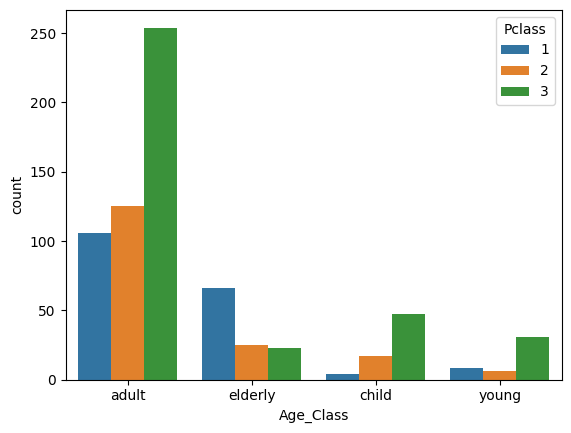

In [42]:
sns.countplot(data=train, x = 'Age_Class', hue = 'Pclass')

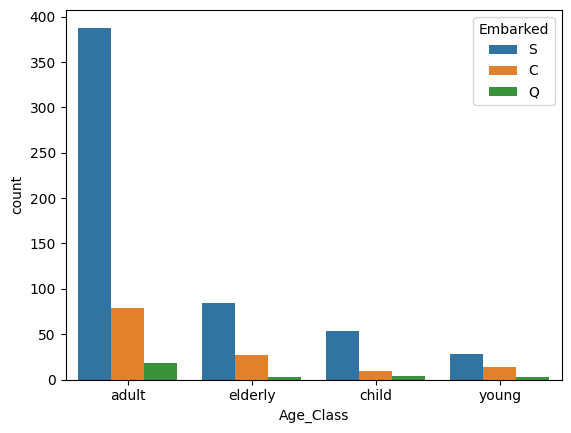

In [43]:
sns.countplot(data=train, x = 'Age_Class', hue = 'Embarked')

In [44]:
train['Age'] = train['Age'].fillna(train.groupby(['Sex', 'Pclass', 'Embarked'])['Age'].transform('mean'))

In [45]:
train.isna().sum(axis=0)

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Age_Class    177
Fsize          0
dtype: int64

In [46]:
train['Age_Class'] = train['Age'].apply(age_classification)

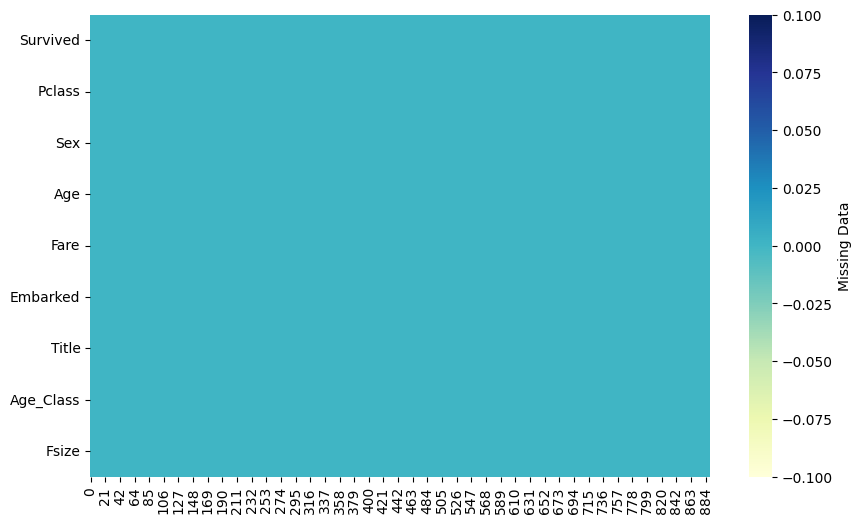

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [48]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_Class,Fsize
0,0,3,male,22.000,7.250,S,Mr,adult,2
1,1,1,female,38.000,71.283,C,Mrs,adult,2
2,1,3,female,26.000,7.925,S,Miss,adult,1
3,1,1,female,35.000,53.100,S,Mrs,adult,2
4,0,3,male,35.000,8.050,S,Mr,adult,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,13.000,S,Other,adult,1
887,1,1,female,19.000,30.000,S,Miss,adult,1
888,0,3,female,23.224,23.450,S,Miss,adult,4
889,1,1,male,26.000,30.000,C,Mr,adult,1


In [49]:
train['Pclass'] = train['Pclass'].astype('category')
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train['Title'] = train['Title'].astype('category')
train['Age_Class'] = train['Age_Class'].astype('category')

In [50]:
train = train.reset_index(drop=True)

# Preprocess

In [51]:
enc = OneHotEncoder(handle_unknown = 'ignore')  

In [52]:
enc_data =  pd.DataFrame(enc.fit_transform(train[['Pclass', 'Sex', 'Embarked', 'Title', 'Age_Class']]).toarray())

In [53]:
enc.categories_

[
    array([1, 2, 3]),
    array(['female', 'male'], dtype=object),
    array(['C', 'Q', 'S'], dtype=object),
    array([' Master', ' Miss', ' Mr', ' Mrs', 'Other'], dtype=object),
    array(['adult', 'child', 'elderly', 'young'], dtype=object)
]

In [54]:
train = train.join(enc_data).drop(columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Age_Class'])

In [55]:
train

,Survived,Age,Fare,Fsize,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,16
0,0,22.000,7.250,2,0.000,0.000,1.000,0.000,1.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
1,1,38.000,71.283,2,1.000,0.000,0.000,1.000,0.000,1.000,...,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
2,1,26.000,7.925,1,0.000,0.000,1.000,1.000,0.000,0.000,...,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3,1,35.000,53.100,2,1.000,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
4,0,35.000,8.050,1,0.000,0.000,1.000,0.000,1.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,27.000,13.000,1,0.000,1.000,0.000,0.000,1.000,0.000,...,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
885,1,19.000,30.000,1,1.000,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
886,0,23.224,23.450,4,0.000,0.000,1.000,1.000,0.000,0.000,...,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
887,1,26.000,30.000,1,1.000,0.000,0.000,0.000,1.000,1.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000


# Comparando modelos

In [56]:
X = train.iloc[:,1:]
y = train.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [67]:
X_train

,Age,Fare,Fsize,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6,54.000,51.862,1,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
575,34.000,13.000,1,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
444,4.000,81.858,3,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
73,32.000,56.496,1,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
669,40.000,39.000,3,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,26.575,7.775,1,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
270,25.000,0.000,1,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
860,48.000,25.929,1,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
435,21.000,34.375,5,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000


In [71]:
SEED = 42
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = DecisionTreeClassifier(max_depth=3)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_xgb = xgb.XGBClassifier()
models = [model, model_svc, model_log, model_rand, model_xgb]
name = ['Árvore de Decisão', 'SVC', 
        'Regressão Logística', 'Random Forest', 'Xgb']
count = 0
for item in models:
    np.random.seed(SEED)
    X_train.columns = X_train.columns.astype(str)
    results = cross_val_score(item, X_train, y_train, cv = cv, 
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão: 82.35%
Intervalo de acurácia - Modelo Árvore de Decisão: [75.63% ~ 89.08%]

Acurácia média - Modelo SVC: 67.39%
Intervalo de acurácia - Modelo SVC: [62.96% ~ 71.83%]

Acurácia média - Modelo Regressão Logística: 82.18%
Intervalo de acurácia - Modelo Regressão Logística: [76.83% ~ 87.54%]

Acurácia média - Modelo Random Forest: 83.70%
Intervalo de acurácia - Modelo Random Forest: [77.82% ~ 89.58%]

Acurácia média - Modelo Xgb: 81.51%
Intervalo de acurácia - Modelo Xgb: [76.31% ~ 86.72%]



In [72]:
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = xgb.XGBClassifier()
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'precision')

intervalo_prec(results)

Precisão média: 77.12%
Intervalo de Precisão: [72.55% ~ 81.68%]


In [73]:
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = xgb.XGBClassifier()
results = cross_val_score( model, X_train, y_train, cv = cv, scoring = 'recall')

intervalo_recall(results)

Recall médio: 74.35%
Intervalo de Recall: [56.44% ~ 92.25%]


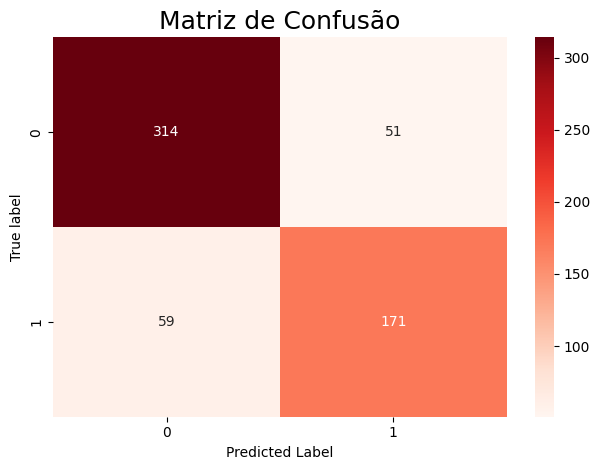

In [74]:
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = xgb.XGBClassifier()
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [75]:
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.8418    0.8603    0.8509       365
           1     0.7703    0.7435    0.7566       230

    accuracy                         0.8151       595
   macro avg     0.8060    0.8019    0.8038       595
weighted avg     0.8142    0.8151    0.8145       595



# Análise com X_test

In [86]:
np.random.seed(SEED)
final_model = xgb.XGBClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8361    0.8315    0.8338       184
           1     0.7207    0.7273    0.7240       110

    accuracy                         0.7925       294
   macro avg     0.7784    0.7794    0.7789       294
weighted avg     0.7929    0.7925    0.7927       294

